## comp340 Midterm: Analyzing delays in flights

We likely have all flown on airplanes or know someone who has. Air travel has become an ever-present aspect in many people’s lives. If you live in or are visiting a relatively large city and you walk around that city’s airport, you see gates showing flight information from many different airlines. And you will frequently see that some flights are delayed because of a variety of conditions. Can we predict which flights are going to get delayed?

In this lab, we are going to analyze data related to flights out of New York City in 2013 collected by Hadley Wickham, to understand factors that give rise to delays. Specifically, this data contains five files in .csv format with information about all domestic flights departing from New York City in 2013, from either Newark Liberty International (EWR), John F. Kennedy International (JFK), or LaGuardia (LGA) airports:

- flights: information on 336,776 flights from one of the 3 NYC airports in 2013
- airlines: translation between two letter IATA carrier codes and names (16 in total)
- planes: construction information about each of 3,322 planes used
- weather: hourly meteorological data (about 8705 observations) for each of the three NYC airports
- airports: airport names and locations

## Set up notebook and load data files
- these data files are in the Files Tab on Canvas under week7. Move the .csv files into the same folder as the midterm lab (this IPython notebook).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
plt.rcParams['figure.figsize']= (10,8)

airlines = pd.read_csv('airlines.csv')
airports = pd.read_csv('airports.csv')
planes = pd.read_csv('planes.csv')
weather = pd.read_csv('weather.csv')
flights = pd.read_csv('flights.csv')
flights.head()

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,1,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,3,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,4,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,5,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


## A quick introduction to the data files

### The flights dataframe

The flights dataframe has the following pieces of information associated with each flight
- year: year (all entries have value 2013)
- month: values 1-12 (corresponding to the month of the flight)
- day: values 1-31 (corresponding to day of the flight)
- dep_time: values 1-2400 
- sched_dep_time: values 1-2400
- dep_delay: values of departure delay (in minutes); negative values mean flight departed before scheduled time
- arr_time: values 1-2400
- sched_arr_time: values 1-2400
- arr_delay: values of arrival delay (in minutes); negative values mean flight arrived before scheduled time
- carrier: one of 16 carrier codes (more information about carriers in the dataframe airlines)
- flight: flight number (integer)
- tailnum: unique identifier (alphanumeric) of an airplane (more information about planes in the planes dataframe)
- origin: one of EWR, LGA, JFK (the three airports in NYC)
- dest: one of destination airport codes (more information in the airports dataframe)
- air_time: number of minutes the flight is in the air
- distance: number of miles between origin and destimation airport
- hour: integer values 0-23, denoting departure hour in 24 hour format
- minute integer values 0-59, denoting departure minute of flight
- time_hour: string representation of date and time of flight departure. You can convert it to a datetime format with pd.to_datetime()
    
### The weather dataframe

The weather dataframe has information on weather conditions on the hour for each day in 2013 for  the three  airports in NYC
- origin: one of EWR, LGA, JFK (the three airports in NYC)
- year: year (all entries have value 2013)
- month: values 1-12
- day: values 1-31
- hour: integer values 0-23
- temp: temperature (float)
- dewp: dewpoint (float)
- humid: humidity (float)
- wind_dir: wind direction (float)
- wind_speed: wind speed (float)
- wind_gust: wind gust (mostly NAs -- ignore or drop this column in your analysis)
- precip: precipitation (float)
- pressure: barometric pressure (float)
- visib: visibility (float)
- time_hour: string representation of date and time

### The airports dataframe
The airports dataframe has information about the destination airports.
- faa: 3 letter code for the airport
- name: full name of the airport
- lat: latitude of airport
- lon: longitude of airport
- alt: altitude of airport
- tz: values -5:-10,8 (we do not use this information)
- dst: A, U or N (some unknown code)
- tzone: time zone of airport (text field)

### The airlines dataframe
The airlines dataframe has information about the carriers
- carrier: carrier code
- name: full name of airline

### The planes dataframe
The planes dataframe has information about each plane
- tailnum: unique ID of an airplane
- year: year of manufacture
- type: string (three types of aircraft)
- manufacturer: string (the manufacturer of the aircraft)
- model: string (the model of the aircraft)
- engines: number of engines (integer)
- seats: number of seats on plane (integer)
- speed: max cruising speed (float)
- engine: engine type (6 types) (string)

## Exploratory data analysis

Write code (1-3 lines at most per question) to answer the following. Place the code in separate cells below.

- What are the average departure delays associated with each airline? Produce a plot that shows the average departure delay over the entire year for each airline company. Which airline has the highest average departure delay for 2013?
- The total delay of a flight is the sum of its departure delay and its arrival delay. Construct a subset of the flights dataframe which has total delay greater than zero. Call this subset delayed_flights. Group delayed_flights by day and month and calculate average total delays for each day of the year.  Which date (day and month) has the highest average delay -- i.e., what is the worst date in 2013 to fly out of NYC?
- Which flight had the longest total delay in 2013? Which airport did it originate from? What was its destination? On which day/month did this flight occur?
- Plot a histogram of total delay in the delayed_flights dataframe. What are the mean and standard deviation of this distribution?
- Group delayed_flights by destination and find the 5 destination airports with the highest arrival delays in 2013.

carrier
9E    16.725769
AA     8.586016
AS     5.804775
B6    13.022522
DL     9.264505
EV    19.955390
F9    20.215543
FL    18.726075
HA     4.900585
MQ    10.552041
OO    12.586207
UA    12.106073
US     3.782418
VX    12.869421
WN    17.711744
YV    18.996330
Name: dep_delay, dtype: float64


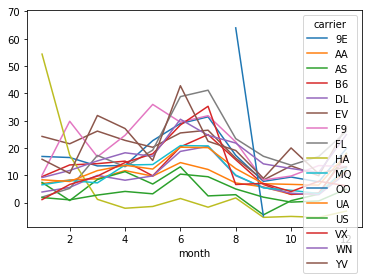

In [8]:
# code for EDA Q1
air_group = flights.groupby('carrier')['dep_delay'].mean()
print(air_group)

flights.groupby(['carrier', 'month'])['dep_delay'].mean().unstack().transpose().plot()

#F9 had the longest average departure delays



In [11]:
# code for EDA Q2
flights['total_delay'] = flights.dep_delay + flights.arr_delay
flights.head()
delayed_flights = flights[flights['total_delay'] > 0]
#print(delayed_flights.groupby(['day','month']))

In [12]:
# code for EDA Q3
flights.sort_values('total_delay', ascending=False)
#Flight = , Airport = JFK, Destination = HNL, Date = January 9th

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,total_delay
7072,7073,2013,1,9,641.0,900,1301.0,1242.0,1530,1272.0,...,51,N384HA,JFK,HNL,640.0,4983,9,0,2013-01-09 09:00:00,2573.0
235778,235779,2013,6,15,1432.0,1935,1137.0,1607.0,2120,1127.0,...,3535,N504MQ,JFK,CMH,74.0,483,19,35,2013-06-15 19:00:00,2264.0
8239,8240,2013,1,10,1121.0,1635,1126.0,1239.0,1810,1109.0,...,3695,N517MQ,EWR,ORD,111.0,719,16,35,2013-01-10 16:00:00,2235.0
327043,327044,2013,9,20,1139.0,1845,1014.0,1457.0,2210,1007.0,...,177,N338AA,JFK,SFO,354.0,2586,18,45,2013-09-20 18:00:00,2021.0
270376,270377,2013,7,22,845.0,1600,1005.0,1044.0,1815,989.0,...,3075,N665MQ,JFK,CVG,96.0,589,16,0,2013-07-22 16:00:00,1994.0
173992,173993,2013,4,10,1100.0,1900,960.0,1342.0,2211,931.0,...,2391,N959DL,JFK,TPA,139.0,1005,19,0,2013-04-10 19:00:00,1891.0
151974,151975,2013,3,17,2321.0,810,911.0,135.0,1020,915.0,...,2119,N927DA,LGA,MSP,167.0,1020,8,10,2013-03-17 08:00:00,1826.0
270987,270988,2013,7,22,2257.0,759,898.0,121.0,1026,895.0,...,2047,N6716C,LGA,ATL,109.0,762,7,59,2013-07-22 07:00:00,1793.0
87238,87239,2013,12,5,756.0,1700,896.0,1058.0,2020,878.0,...,172,N5DMAA,EWR,MIA,149.0,1085,17,0,2013-12-05 17:00:00,1774.0
195711,195712,2013,5,3,1133.0,2055,878.0,1250.0,2215,875.0,...,3744,N523MQ,EWR,ORD,112.0,719,20,55,2013-05-03 20:00:00,1753.0


In [ ]:
# code for EDA Q4
delayed_flights.groupby('total_delay').plot.hist(legend=True)


/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [ ]:
# code for EDA Q5
delayed_flights.groupby('dest').sort_values('arr_delay')

## Building predictive models of delays
We will now build predictive models of flight delays based on the following pieces of information contained in the delayed_flights and weather dataframes. The problem is identify which flights will experience a total delay of more than 60 minutes based on a set of predictors. The predictor variables from the flights dataframe are:
- month
- day
- hour
- dep_time
- air_time
- distance

and from the weather dataframe are
- temp
- dewp
- humid
- wind_dir
- wind_speed
- precip
- pressure
- visib

Now follow the steps below to construct X and y for this classification problem.
- Merge the data in the delayed_flights and weather dataframe to bring together all these predictors (and the column total_delay) for each flight into a new dataframe called delayed_flights_weather. 
- Drop all columns in delayed_flights_weather that are not in the set of predictors listed above + 'total_delay'
- Drop rows in the new dataframe (with just the predictor columns and total_delay) that contain NAs.
- Construct the label vector y (labels: 1 (total delay more than 60 minutes) and 0 (total delay less than 60 mintes)) from the new delayed_flights_weather dataframe by using the total_delay column 
- Drop the total_delay column from delayed_flights_weather dataframe
- Convert the new delayed_flights_weather dataframe into a numpy matrix X with the .values() method. 

Use sklearn's model_selection.train_test_split() function to construct a train/test split in the 80/20 ratio.

Now build three families of models
  - Use sklearn's linear_model.LogisticRegression() with default parameters to build a logistic model on the training X and training y.
  - Use sklearn's tree.DecisionTreeClassifier() with default parameters to build a decision tree model on the same training X and training y.
  - Use sklearn's ensemble.RandomForestClassifier(n_estimators=100) to build a random forest of 100 trees on the same training X and training y.
  
Test all three models 
   - Use sklearn's metrics.roc_auc_score and metrics.confusion_matrix to test model performance on the set aside test X and test y.


Which model performs the best? Why?




In [7]:
# code for building and testing predictive models